<a href="https://colab.research.google.com/github/dielemonteiro/Car_Damage_detection/blob/main/Car_Damage_detection_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bussiness Understanding

In this case, I'll to build a vehicle damage evaluation classification by applying the KNN algorithm.

## Exploratory Data Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the library to visualising

import ipywidgets as widgets
from IPython.display import display

style = {'Descrição_Variáveis': 'initial'}


In [3]:
# Importing the essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics

In [4]:
# Importing and read the dataset

df = pd.read_csv('/content/drive/MyDrive/CDP/M5/M5A24/dano.csv', delimiter=';')
df

,ID_Veicular,Laterais,Dianteira,Traseira,Teto,Dano_Veicular
0,0,5.1,3.5,1.4,0.2,Dano-Alto
1,1,4.9,3.0,1.4,0.2,Dano-Alto
2,2,4.7,3.2,1.3,0.2,Dano-Alto
3,3,4.6,3.1,1.5,0.2,Dano-Alto
4,4,5.0,3.6,1.4,0.2,Dano-Alto
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,Dano-Baixo
146,146,6.3,2.5,5.0,1.9,Dano-Baixo
147,147,6.5,3.0,5.2,2.0,Dano-Baixo
148,148,6.2,3.4,5.4,2.3,Dano-Baixo


In [5]:
# Checking informations about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID_Veicular    150 non-null    int64  
 1   Laterais       150 non-null    float64
 2   Dianteira      150 non-null    float64
 3   Traseira       150 non-null    float64
 4   Teto           150 non-null    float64
 5   Dano_Veicular  150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Checking descriptive statistics 

df.describe()

,ID_Veicular,Laterais,Dianteira,Traseira,Teto
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.describe(include=object)

,Dano_Veicular
count,150
unique,3
top,Dano-Alto
freq,50


In [8]:
# Checking for missing values

df.isnull().sum()

ID_Veicular      0
Laterais         0
Dianteira        0
Traseira         0
Teto             0
Dano_Veicular    0
dtype: int64

In [9]:
# Checking for duplicated values

duplicate_rows = df.duplicated().sum()
print('Number of duplicate rows: ', duplicate_rows)

Number of duplicate rows:  0


In [10]:
# Checking target variable

df['Dano_Veicular'].value_counts()

Dano-Alto     50
Dano-Medio    50
Dano-Baixo    50
Name: Dano_Veicular, dtype: int64

Text(0.5, 0.98, 'Histograms of all Numerical Features')

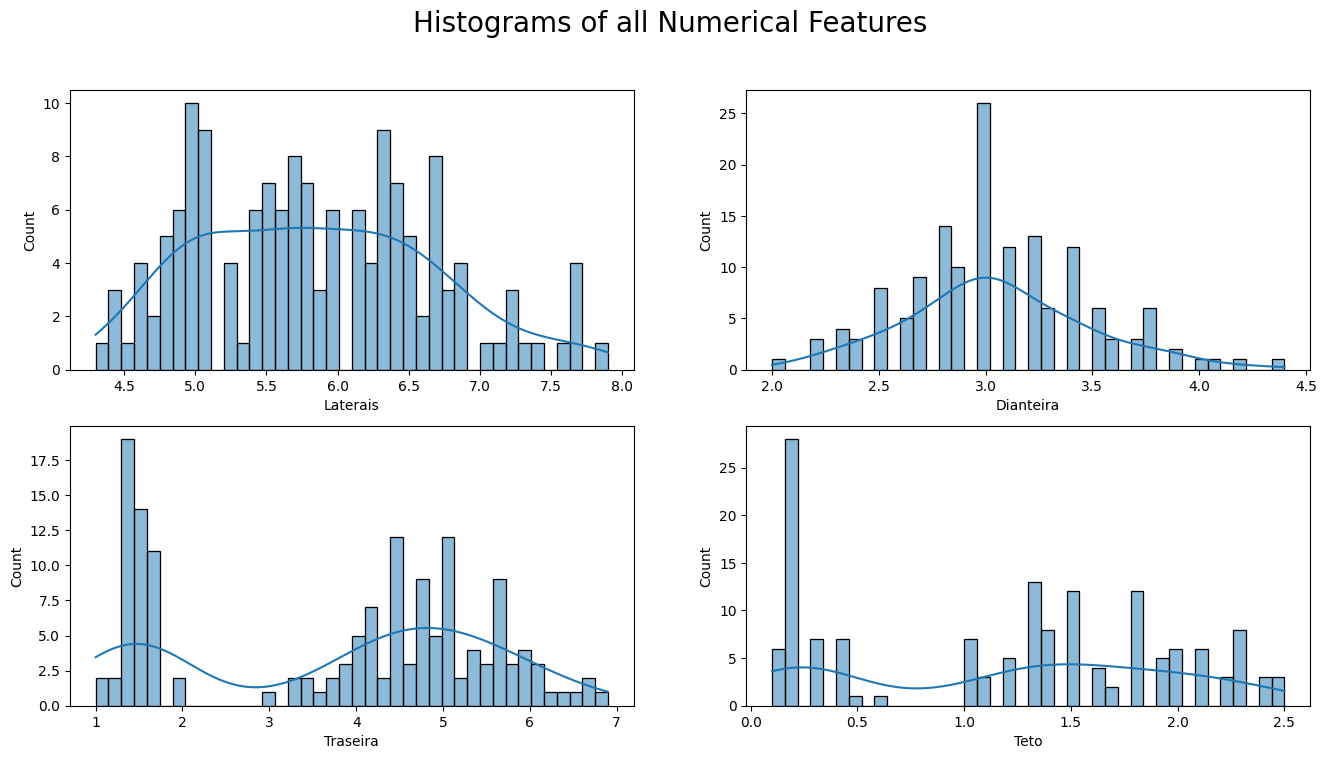

In [11]:
# Ploting histogram of all numerical features

_,ax = plt.subplots(2,2, figsize = [16, 8])
sns.histplot(x = 'Laterais', kde = True, bins = 40, data = df, ax = ax[0][0])
sns.histplot(x = 'Dianteira', kde = True, bins = 40, data = df, ax = ax[0][1])
sns.histplot(x = 'Traseira', kde = True, bins = 40, data = df, ax = ax[1][0])
sns.histplot(x = 'Teto', kde = True, bins = 40, data = df, ax = ax[1][1])
plt.suptitle('Histograms of all Numerical Features', fontsize = 20)

In [12]:
from tables import description
from pandas._config import options

# Plotting boxplot with the continuous data attributes

wig_col = widgets.Dropdown(
                options=[col for col in df.columns.tolist() if col.startswith(('Laterais', 'Dianteira', 'Traseira', 'Teto'))],
                description='Choose a column to Plot',
                disabled=False,
                layout=widgets.Layout(width='40%', height='40px'),
                sttyle=style)

Dropdown(description='Choose a column to Plot', layout=Layout(height='40px', width='40%'), options=('Laterais'…

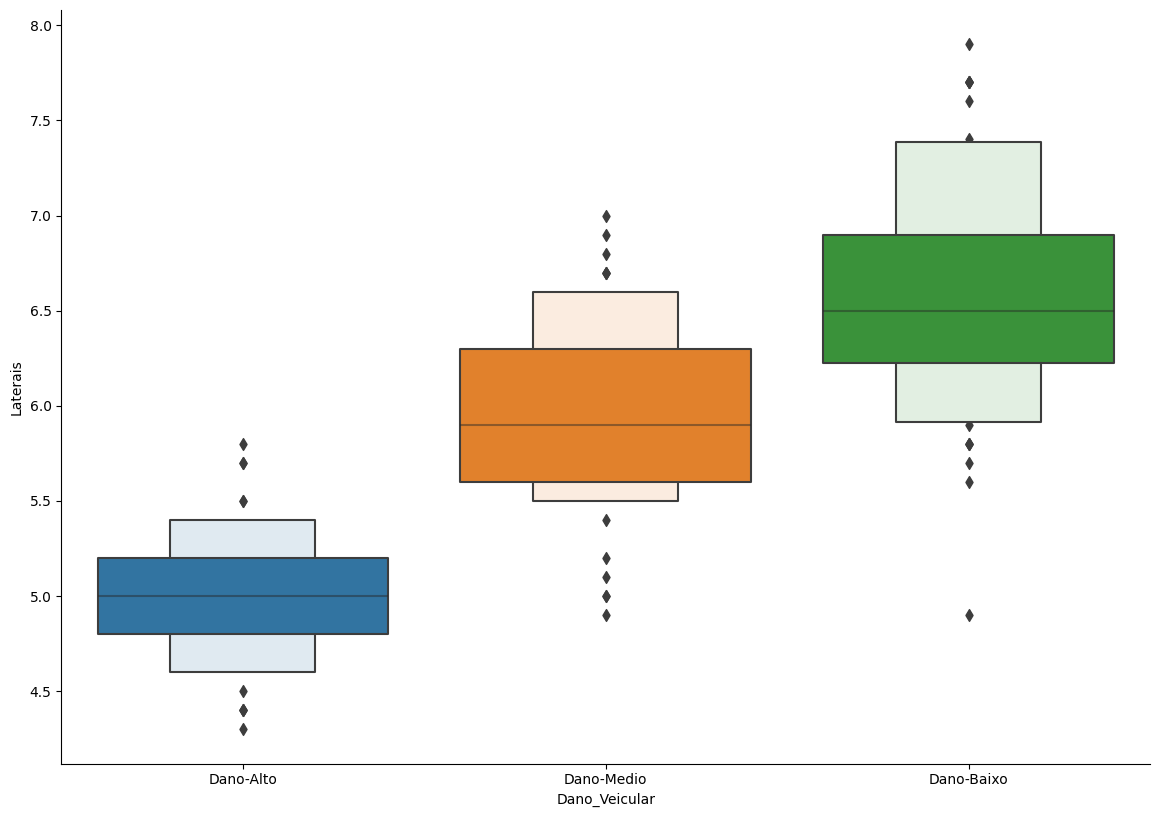

In [13]:
display(wig_col)

sns.catplot(x='Dano_Veicular', y=wig_col.value, kind='boxen', data=df, height=8.27, aspect=11.7/8.27);

<Figure size 800x500 with 0 Axes>

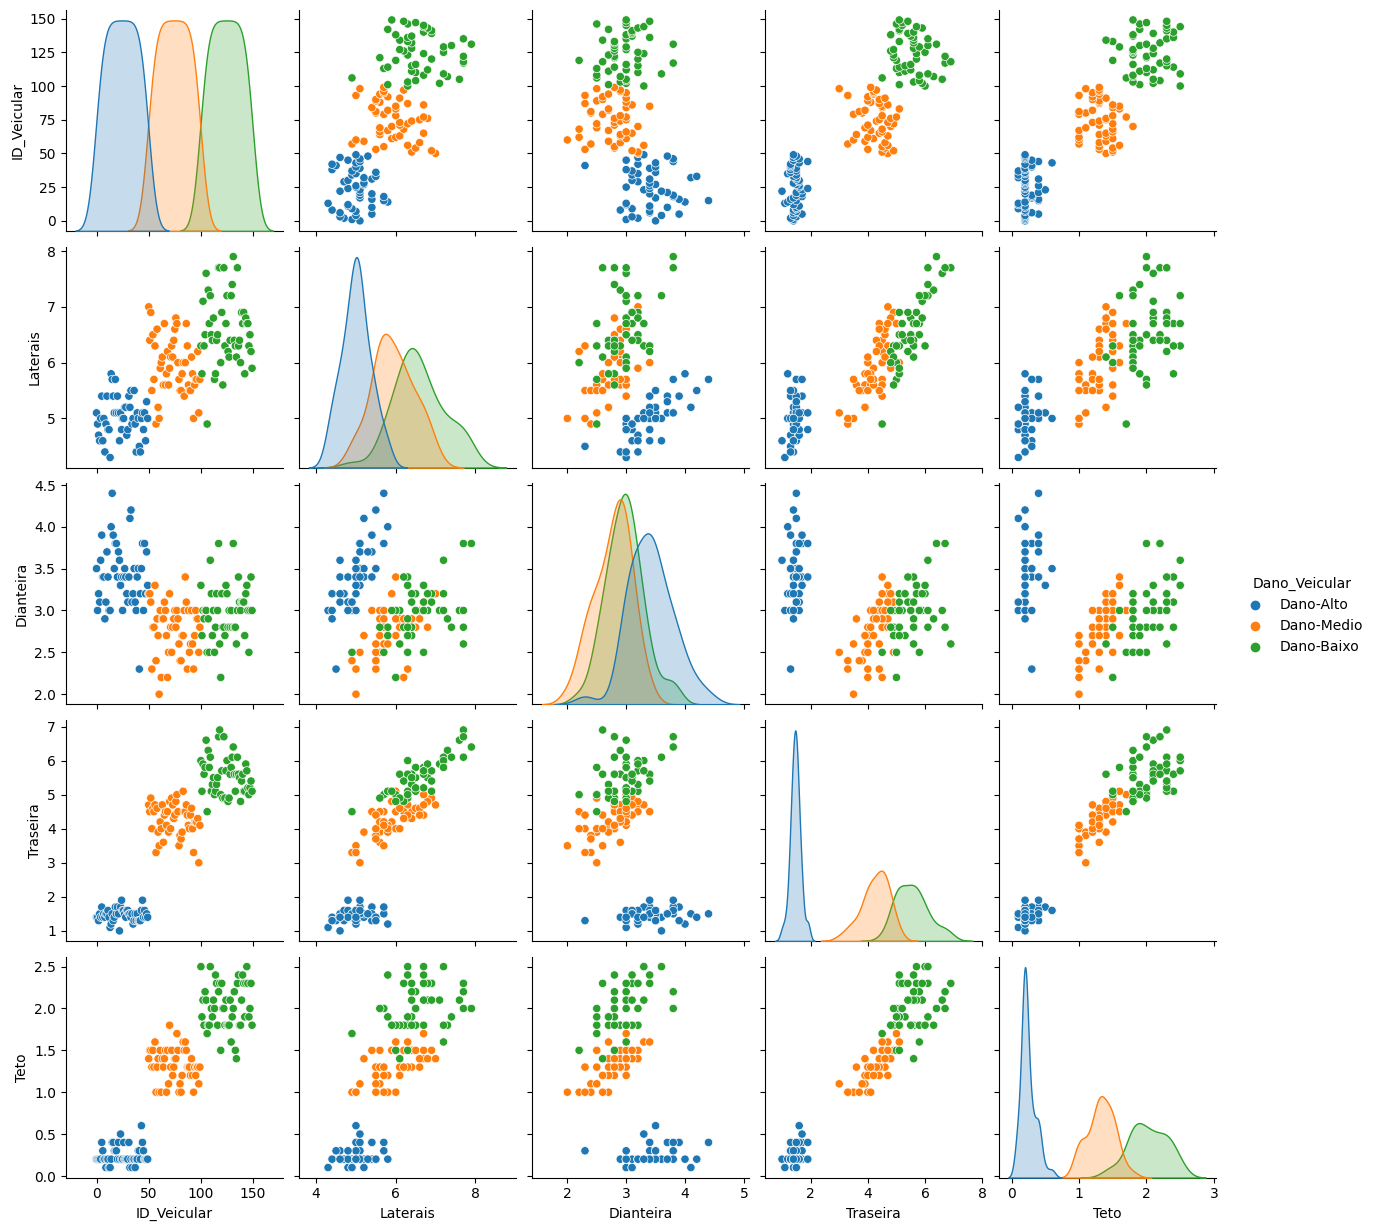

In [14]:
#Plotting pairplot

plt.figure(figsize=(8,5))
sns.pairplot(df, hue='Dano_Veicular')
plt.show()

## Data Preparation

In [15]:
# Splitting the variables X and y

X = df.iloc[:,:-1].values #Independents variables
y = df.iloc[:,-1].values #Target

In [16]:
#Splintting teh dataset into the training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 7)

In [17]:
X_train.shape, X_test.shape

((120, 5), (30, 5))

#### Encode Data

In [18]:
# Transform the target on numerical variable

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Dano_Veicular'] = label_encoder.fit_transform(df['Dano_Veicular'])

In [19]:
df

,ID_Veicular,Laterais,Dianteira,Traseira,Teto,Dano_Veicular
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,1
146,146,6.3,2.5,5.0,1.9,1
147,147,6.5,3.0,5.2,2.0,1
148,148,6.2,3.4,5.4,2.3,1


#### Standardizing Data

In [20]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

standard = StandardScaler()

X_train = standard.fit_transform(X_train)
X_test = standard.transform(X_test)

# Visualizing the data standard

print('\nX_train :\n', X_train[:5])
print('\nX_test :\n', X_test[:5])


X_train :
 [[ 1.20732325  0.43325894 -0.59653573  0.62601116  0.82081788]
 [ 0.14948526 -0.15754871 -1.05688485 -0.09737951 -0.21464226]
 [-1.13342464 -1.45732553  1.24486074 -1.48851543 -1.2501024 ]
 [ 1.49991673  1.26038965  0.09398794  0.95988378  1.20911544]
 [ 0.03694931  0.669582   -0.36636117  0.34778398  0.17365529]]

X_test :
 [[ 1.72498864  0.07877435 -0.13618661  0.79294747  0.82081788]
 [ 0.26202122 -0.51203329 -0.13618661  0.45907485  0.43252033]
 [-0.72829519 -0.98467941  1.01468618 -1.32157912 -1.12066988]
 [-0.14310822 -0.27571024 -0.13618661  0.45907485  0.43252033]
 [ 0.75717942 -1.10284094 -1.28705941  0.45907485  0.69138537]]


## Modeling the baseline with KNN Classifier

In [21]:
# Importing KNN library

from sklearn.neighbors import KNeighborsClassifier

# Set params for the model
neigh_wig = widgets.Dropdown(options = [1, 10, 30, 100],
                             description ='Number of Neighbours = ', style = style)
display(neigh_wig)

Dropdown(description='Number of Neighbours = ', options=(1, 10, 30, 100), value=1)

#### Training the baseline model

In [22]:
predict_machine = KNeighborsClassifier(n_neighbors=neigh_wig.value)

# Feed the training data to the classifier
predict_machine = predict_machine.fit(X_train, y_train)

# Predicting the damage for test set
y_pred = predict_machine.predict(X_test)

print('Predict Data :', y_pred)
print('Real Data :', y_test)

Predict Data : ['Dano-Baixo' 'Dano-Medio' 'Dano-Alto' 'Dano-Medio' 'Dano-Medio'
 'Dano-Medio' 'Dano-Medio' 'Dano-Medio' 'Dano-Alto' 'Dano-Medio'
 'Dano-Medio' 'Dano-Medio' 'Dano-Alto' 'Dano-Baixo' 'Dano-Alto'
 'Dano-Medio' 'Dano-Baixo' 'Dano-Baixo' 'Dano-Alto' 'Dano-Alto'
 'Dano-Medio' 'Dano-Baixo' 'Dano-Medio' 'Dano-Medio' 'Dano-Baixo'
 'Dano-Baixo' 'Dano-Medio' 'Dano-Medio' 'Dano-Baixo' 'Dano-Baixo']
Real Data : ['Dano-Baixo' 'Dano-Medio' 'Dano-Alto' 'Dano-Medio' 'Dano-Baixo'
 'Dano-Alto' 'Dano-Medio' 'Dano-Medio' 'Dano-Alto' 'Dano-Medio'
 'Dano-Medio' 'Dano-Medio' 'Dano-Alto' 'Dano-Baixo' 'Dano-Alto'
 'Dano-Medio' 'Dano-Baixo' 'Dano-Baixo' 'Dano-Alto' 'Dano-Alto'
 'Dano-Medio' 'Dano-Baixo' 'Dano-Medio' 'Dano-Baixo' 'Dano-Baixo'
 'Dano-Baixo' 'Dano-Medio' 'Dano-Medio' 'Dano-Baixo' 'Dano-Baixo']


## Evaluation the baseline model

In [23]:
# Calculling the acuracy

from sklearn import metrics
print('The acuracy is :', metrics.accuracy_score(y_test, y_pred))

The acuracy is : 0.9


In [24]:
# Comparing real vs predict

print('\nReal vs Predict\n')
erro_df = pd.DataFrame({'Real' : y_test,
                        'Predict' : y_pred})

erro_df


Real vs Predict



,Real,Predict
0,Dano-Baixo,Dano-Baixo
1,Dano-Medio,Dano-Medio
2,Dano-Alto,Dano-Alto
3,Dano-Medio,Dano-Medio
4,Dano-Baixo,Dano-Medio
5,Dano-Alto,Dano-Medio
6,Dano-Medio,Dano-Medio
7,Dano-Medio,Dano-Medio
8,Dano-Alto,Dano-Alto
9,Dano-Medio,Dano-Medio


In [25]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(cm)
print(cr)

[[ 6  0  1]
 [ 0  9  2]
 [ 0  0 12]]
              precision    recall  f1-score   support

   Dano-Alto       1.00      0.86      0.92         7
  Dano-Baixo       1.00      0.82      0.90        11
  Dano-Medio       0.80      1.00      0.89        12

    accuracy                           0.90        30
   macro avg       0.93      0.89      0.90        30
weighted avg       0.92      0.90      0.90        30

